In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer

In [2]:
# Read datasets
df1 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
df2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')

In [5]:
df1.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                                           1.791189                                                
3                                           1.776779                                                
4                                           1.712986

In [6]:
df2.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250                                 
2                                           0.445501                                 
3                                           0.445958                                 
4                                           0.445779

In [10]:
df2.describe()

Year  \
count  6840.000000   
mean   2004.500000   
std       8.656074   
min    1990.000000   
25%    1997.000000   
50%    2004.500000   
75%    2012.000000   
max    2019.000000   

       Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                          
mean                                            0.281167                          
std                                             0.047561                          
min                                             0.191621                          
25%                                             0.255468                          
50%                                             0.287456                          
75%                                             0.304760                          
max                                             0.506018                          

       Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                             
mean                                            0.673891                             
std                                             0.258594                             
min                                             0.189344                             
25%                                             0.539791                             
50%                                             0.591893                             
75%                                             0.897248                             
max                                             1.676204                             

       Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                             
mean                                            0.211062                             
std                                             0.152559                             
min                                             0.045425                             
25%                                             0.099857                             
50%                                             0.154143                             
75%                                             0.276891                             
max                                             1.136541                             

       Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                              
mean                                            4.327525                              
std                                             1.177961                              
min                                             1.974823                              
25%                                             3.567064                              
50%                                             4.094443                              
75%                                             4.797286                              
max                                             9.015948                              

       Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                               
mean                                            0.746708                               
std                                             0.463026                               
min                                             0.225471                               
25%                                             0.423502                               
50%                                             0.646050                               
75%                                             0.890013                               
max                          

In [9]:
df1.shape
df2.shape

(6840, 10)

In [3]:
# Merge datasets
data = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'], how='inner')

In [4]:
# Data cleaning and preprocessing
data.drop(['Entity'], axis=1, inplace=True)
data.rename(columns={'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)': 'mental_fitness',
                     'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)': 'Schizophrenia',
                     'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)': 'Bipolar_disorder',
                     'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)': 'Eating_disorder',
                     'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)': 'Anxiety',
                     'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)': 'drug_usage',
                     'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)': 'depression',
                     'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)': 'alcohol'}, inplace=True)


In [11]:
# Convert non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')


In [12]:
# Drop 'Code' column
data.drop(['Code'], axis=1, inplace=True)

In [13]:

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

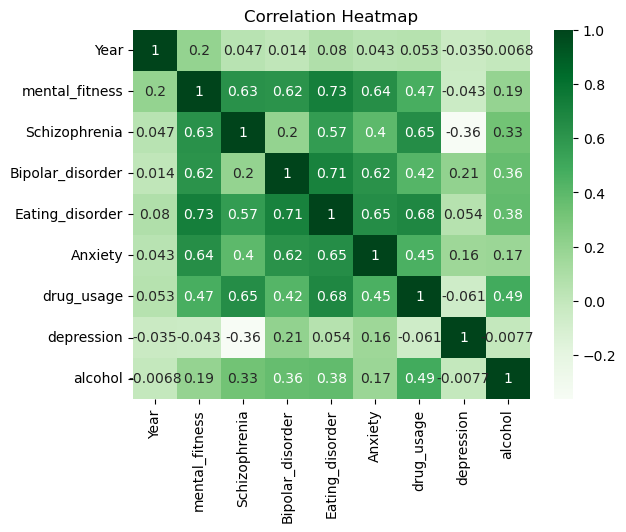

In [18]:
# Exploratory analysis
# Correlation Heatmap
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()

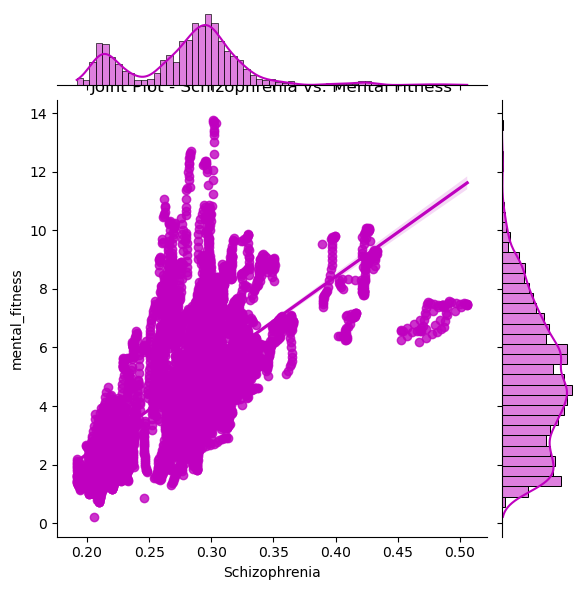

In [19]:
# Joint Plot - Schizophrenia vs. Mental Fitness
sns.jointplot(data=data, x="Schizophrenia", y="mental_fitness", kind="reg", color="m")
plt.title('Joint Plot - Schizophrenia vs. Mental Fitness')
plt.show()

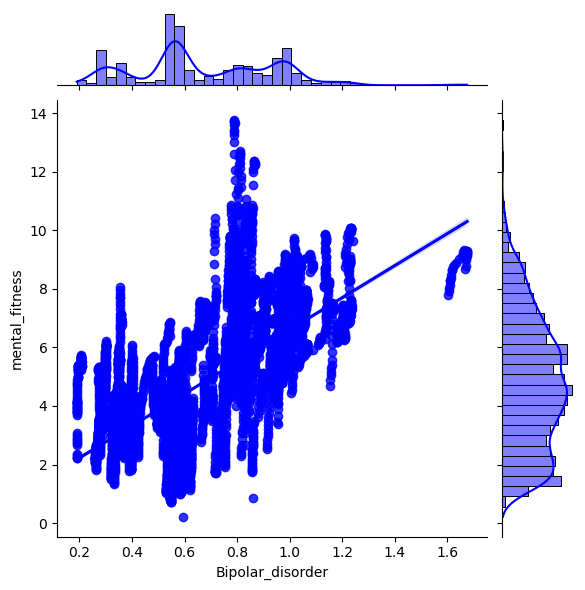

In [16]:
# Joint Plot - Bipolar Disorder vs. Mental Fitness
sns.jointplot(data=data, x='Bipolar_disorder', y='mental_fitness', kind='reg', color='blue')
plt.show()

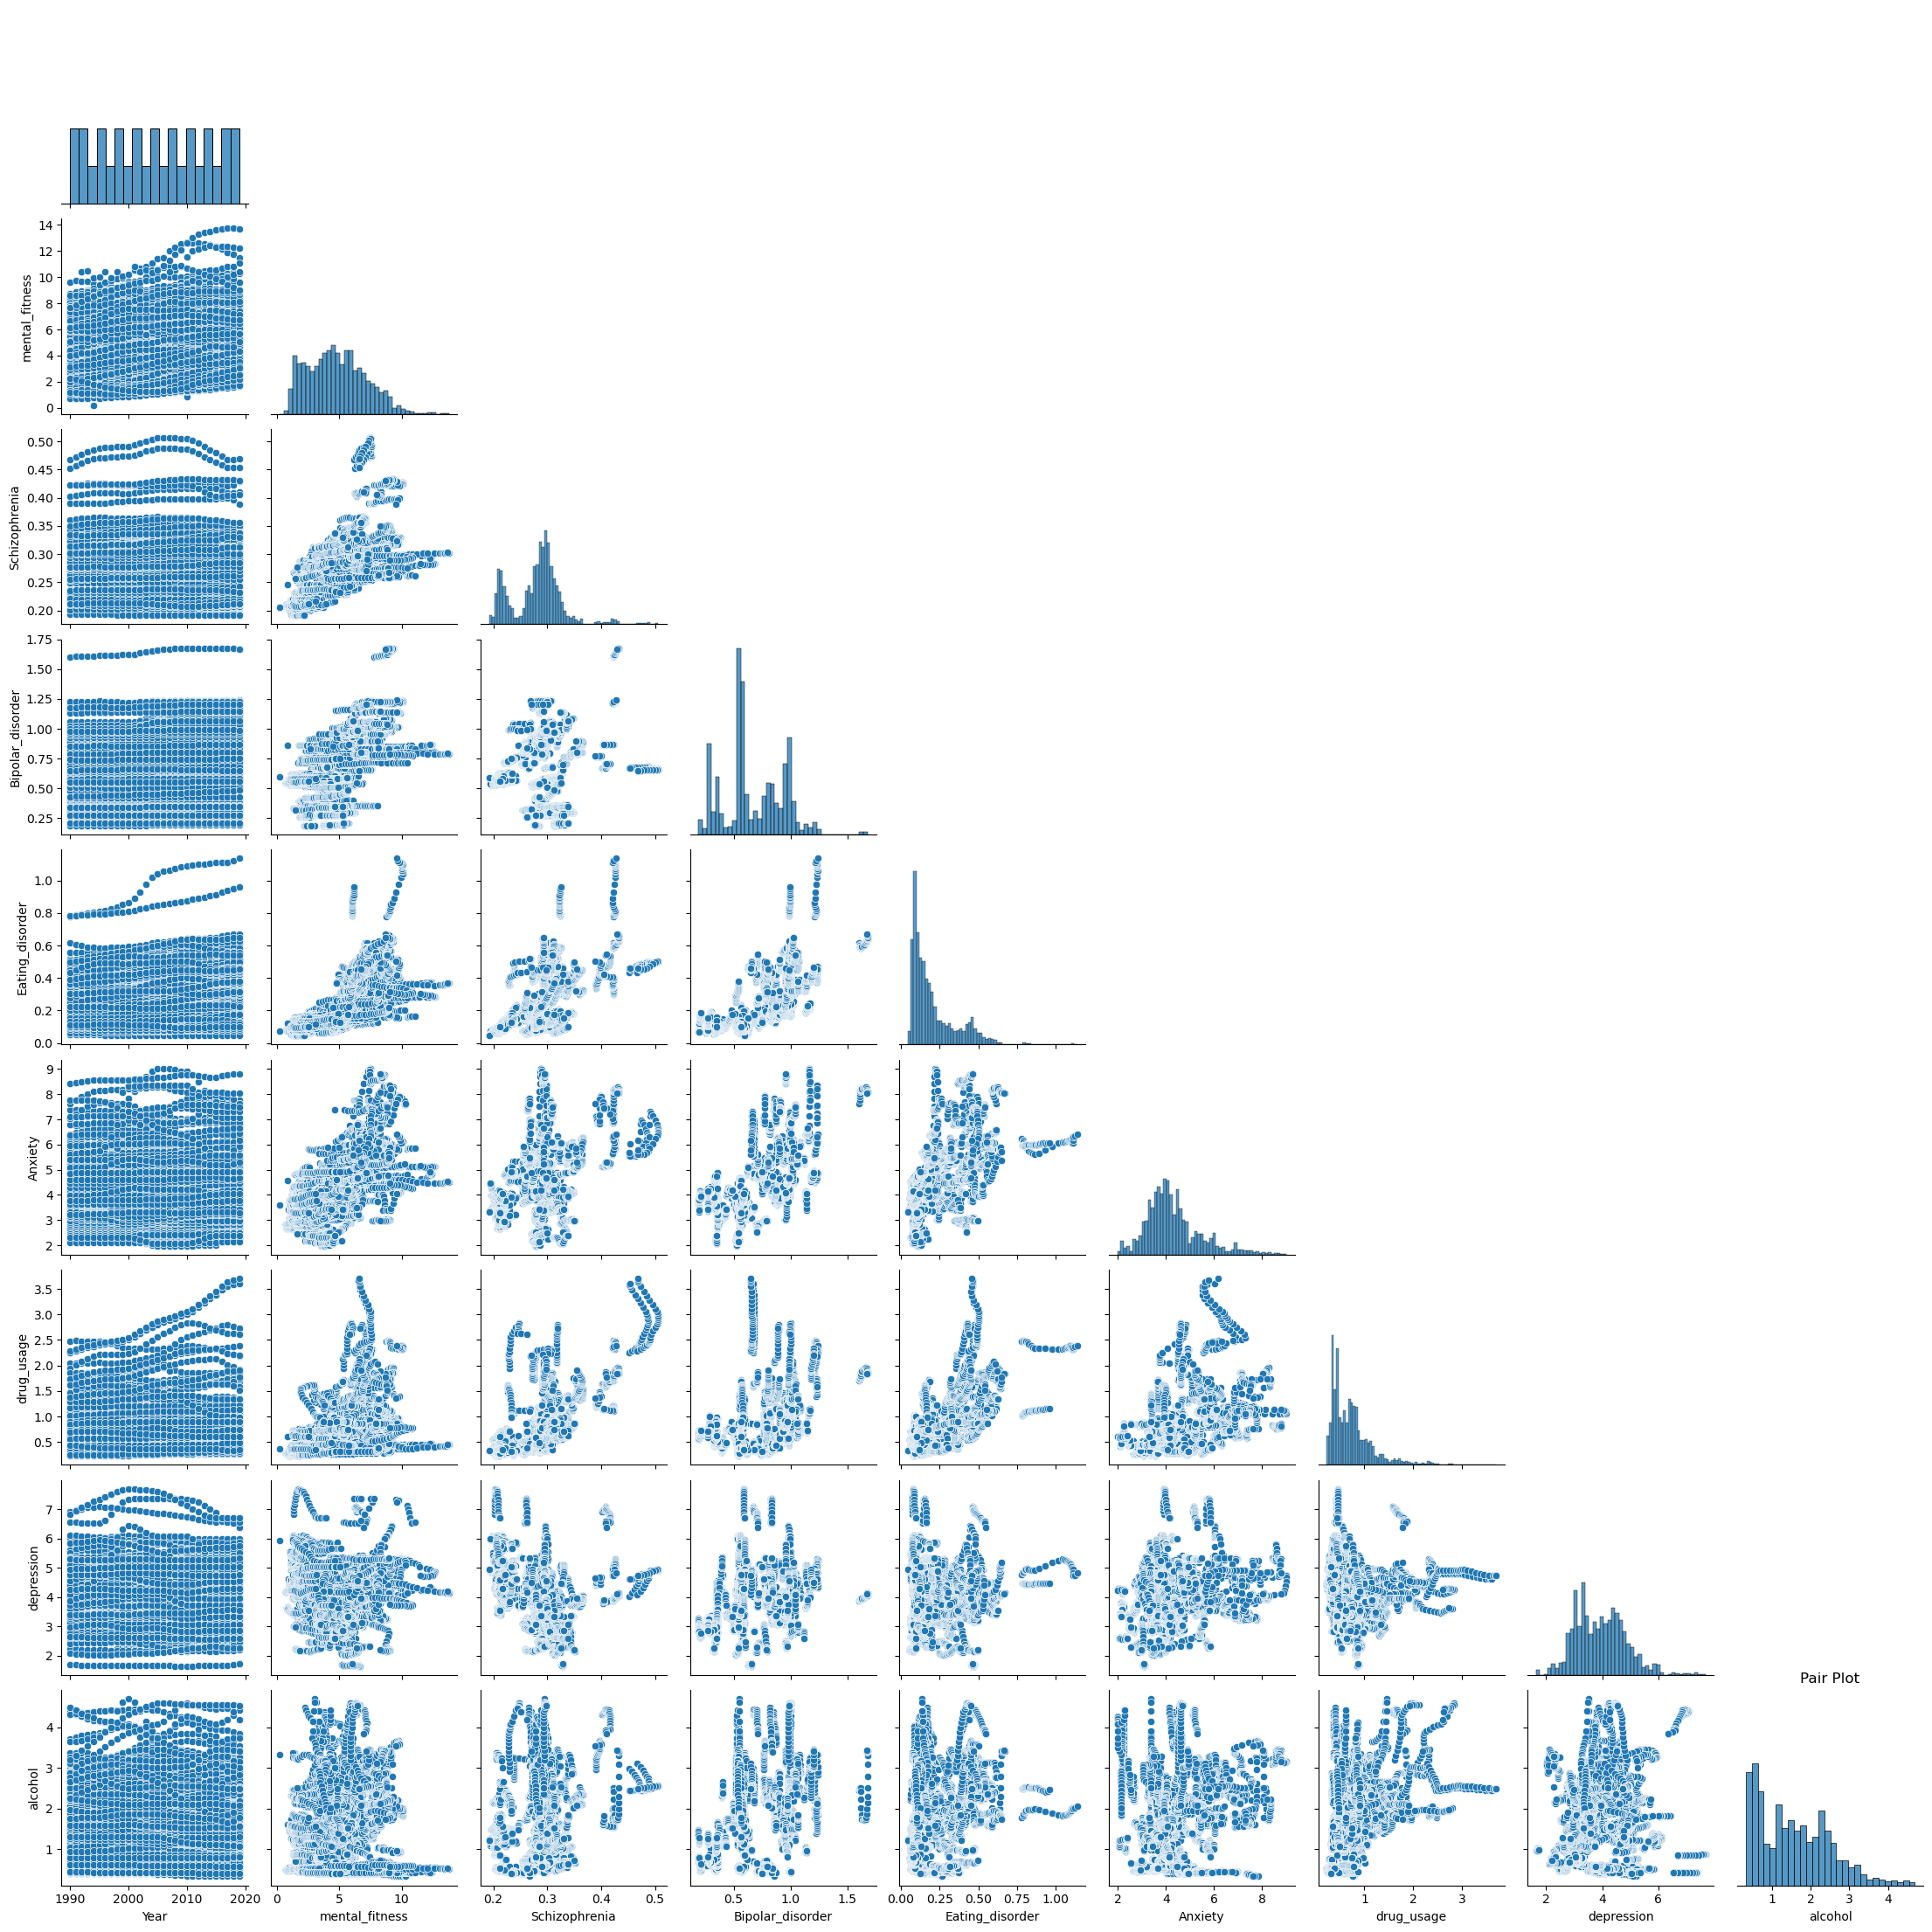

In [17]:
# Pair Plot
sns.pairplot(data=data, corner=True)
plt.title('Pair Plot')
plt.show()

In [20]:
# Pie Chart - Mental Fitness for Top 10 Years
mean_mental_fitness = data['mental_fitness'].mean()
fig = px.pie(data_frame=data.head(10), names='Year', values='mental_fitness')
fig.update_layout(title_text='Pie Chart - Mental Fitness for Top 10 Years', title_x=0.5)
fig.show()

In [21]:
# Bar Chart - Average Mental Fitness for Top 10 Years
fig = px.bar(data.head(10), x='Year', y='mental_fitness', color='Year', template='ggplot2')
fig.update_layout(title_text='Bar Chart - Average Mental Fitness for Top 10 Years', xaxis_title='Year', yaxis_title='Average Mental Fitness')
fig.show()


In [22]:
# Line Chart - Mental Fitness Over the Years
fig = px.line(data_frame=data, x='Year', y='mental_fitness', color='Year', markers=True, template='plotly_dark')
fig.update_layout(title_text='Line Chart - Mental Fitness Over the Years', xaxis_title='Year', yaxis_title='Mental Fitness')
fig.show()


In [23]:
# Data preprocessing
df = data.copy()
encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = encoder.fit_transform(df[column])

X = df.drop('mental_fitness', axis=1)
y = df['mental_fitness']


In [24]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Model evaluation for training set
y_train_pred = lr.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Model evaluation for testing set
y_test_pred = lr.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

In [26]:
print("Linear Regression Results:")
print("Train MSE: ", mse_train)
print("Train RMSE: ", rmse_train)
print("Train R2 Score: ", r2_train)
print("\n")
print("Test MSE: ", mse_test)
print("Test RMSE: ", rmse_test)
print("Test R2 Score: ", r2_test)
print("\n")

Linear Regression Results:
Train MSE:  1.3924374533811699
Train RMSE:  1.1800158699700483
Train R2 Score:  0.7408634010340946


Test MSE:  1.1416819237316884
Test RMSE:  1.0684951678560313
Test R2 Score:  0.7626652123767366




In [27]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Model evaluation for training set
y_train_pred = rf.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Model evaluation for testing set
y_test_pred = rf.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


In [28]:
print("Random Forest Regressor Results:")
print("Train MSE: ", mse_train)
print("Train RMSE: ", rmse_train)
print("Train R2 Score: ", r2_train)
print("\n")
print("Test MSE: ", mse_test)
print("Test RMSE: ", rmse_test)
print("Test R2 Score: ", r2_test)
print("\n")

Random Forest Regressor Results:
Train MSE:  0.005335782823417897
Train RMSE:  0.07304644292104782
Train R2 Score:  0.9990069955312365


Test MSE:  0.031045787457247533
Test RMSE:  0.17619814827984864
Test R2 Score:  0.9935461486955324




In [29]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

# Model evaluation for training set
y_train_pred = gb.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Model evaluation for testing set
y_test_pred = gb.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

In [30]:
print("Gradient Boosting Regressor Results:")
print("Train MSE: ", mse_train)
print("Train RMSE: ", rmse_train)
print("Train R2 Score: ", r2_train)
print("\n")
print("Test MSE: ", mse_test)
print("Test RMSE: ", rmse_test)
print("Test R2 Score: ", r2_test)

Gradient Boosting Regressor Results:
Train MSE:  0.2539699668683147
Train RMSE:  0.5039543301414471
Train R2 Score:  0.9527354616224023


Test MSE:  0.251528876016342
Test RMSE:  0.5015265456746452
Test R2 Score:  0.9477117477910719


In [31]:
# Sample new data for prediction
new_data = pd.DataFrame({
    'Year': [2022, 2022, 2023, 2023],
    'Schizophrenia': [10.5, 9.8, 8.7, 11.2],
    'Bipolar_disorder': [6.3, 7.1, 5.9, 6.8],
    'Eating_disorder': [3.2, 2.9, 3.5, 3.0],
    'Anxiety': [8.6, 7.9, 8.2, 9.0],
    'drug_usage': [4.7, 5.1, 4.5, 4.8],
    'depression': [12.4, 11.9, 13.2, 12.8],
    'alcohol': [5.8, 5.5, 6.1, 6.3]
})


In [32]:
# Data preprocessing for prediction
encoder = LabelEncoder()

for column in new_data.columns:
    if new_data[column].dtype == 'object':
        new_data[column] = encoder.fit_transform(new_data[column])

# Making predictions using the trained Gradient Boosting Regressor model
predicted_mental_fitness = gb.predict(new_data)

# Create a new DataFrame to store the predictions along with other features (if needed)
predictions_df = pd.DataFrame(data={'Year': new_data['Year'], 'Predicted_Mental_Fitness': predicted_mental_fitness})


In [33]:
# Display the predictions
print(predictions_df)

   Year  Predicted_Mental_Fitness
0  2022                 10.259621
1  2022                 10.259621
2  2023                 10.259621
3  2023                 10.259621
